# DS 3000 - Assignment 6

**Student Name**: Lauren Li

**Date**: 06/10/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


Create a SVM classifier to predict the onset of diabetes using the Pima Indians Diabetes Database. Information on the Pima Indians Diabetes DatabaseLinks to an external site. can be obtained directly from kaggle.com. The link also contains the description of each field in the dataset.

## Question 1: 

(5 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

### Load in Data

In [6]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load in the data
diabetes_df = pd.read_csv('diabetes.csv')
#dimensions
print('Daframe dimensions:', diabetes_df.shape)

Daframe dimensions: (768, 9)


In [7]:
#check if dataframe was loaded in properly
diabetes_df.head().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


### Gather Summary Stats & Visualize

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

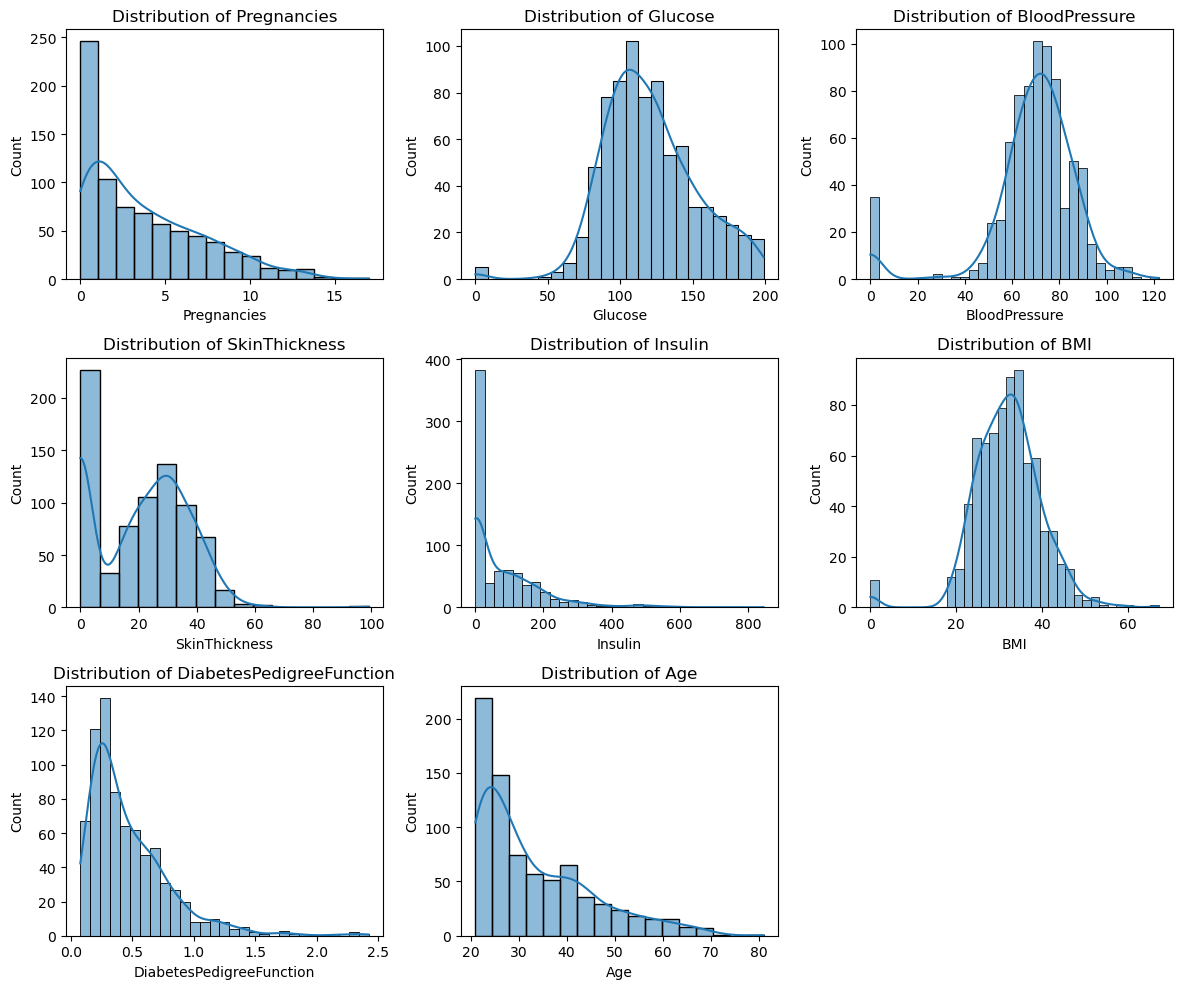

In [9]:
#plot distributions of the data
plt.figure(figsize=(12, 10))

#plot histograms for each feature
for i, column in enumerate(diabetes_df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Looking at these histograms showing the distribution of the values in each column, it can be seen that many of the columns have a right skew (Diabetes Pedigree Function, Age, Insulin, etc.) This means that many of the values are clustered towards lower values with a small amount of higher values for said distributions. This also suggests that some normalization needs to take place before any actual modeling can be done.

Additionally, the histograms such as BMI, Glucose, and Blood Pressure are more or less normally distributed (with Blood Pressure have one odd spike towards the left). This means that the values for these columns pretty much cluster around a central value with tapering on either side.

What's interesting is how for skin thickness there are many values that are less than 5mm while the rest of the data showcases a more normal distribution. This could be worth looking into more as to why this is the case.

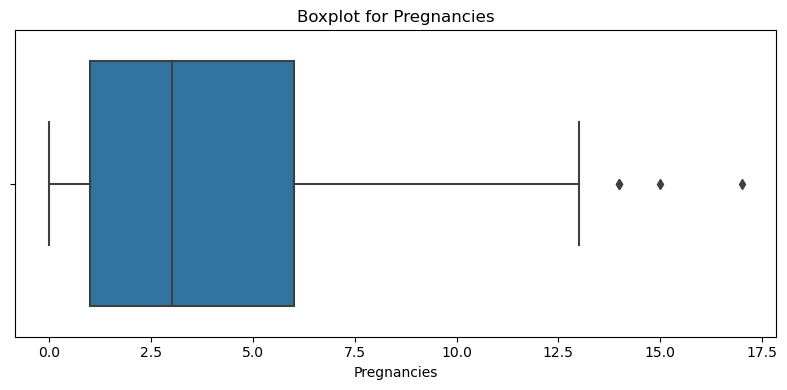

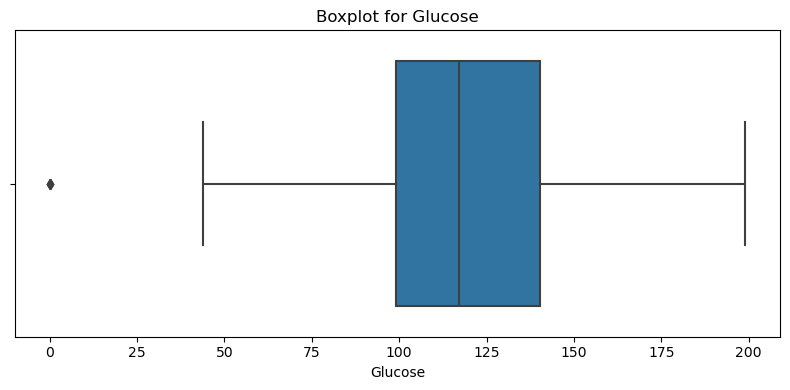

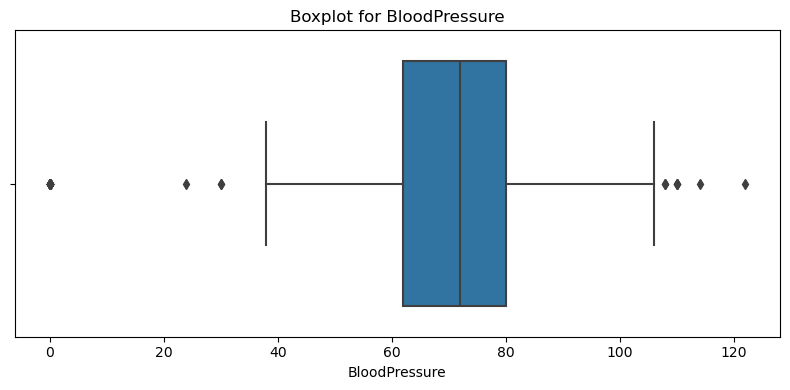

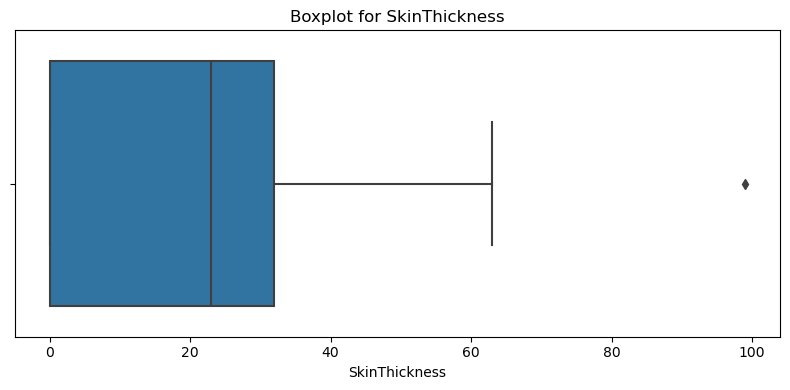

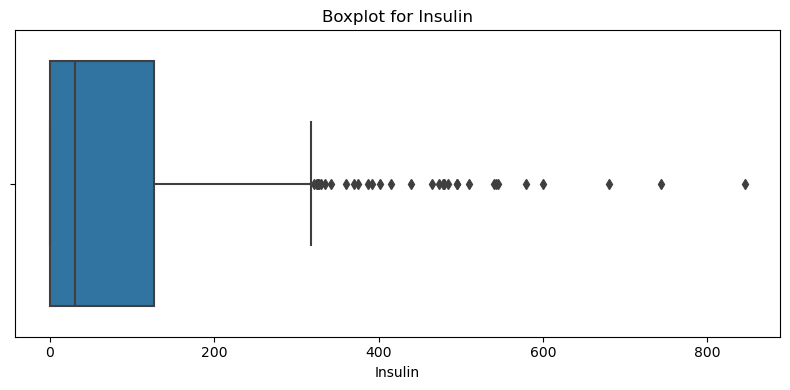

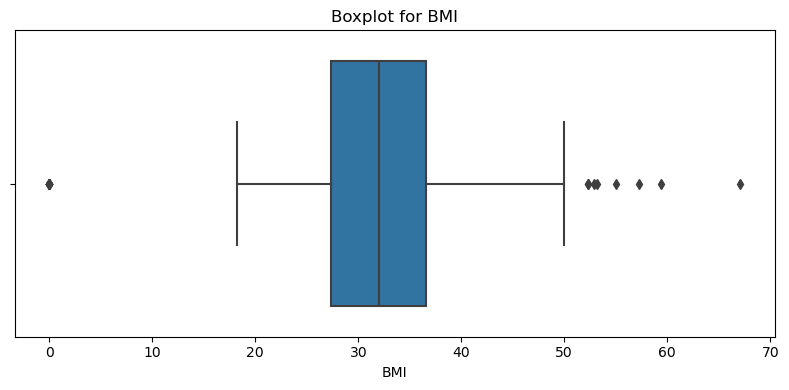

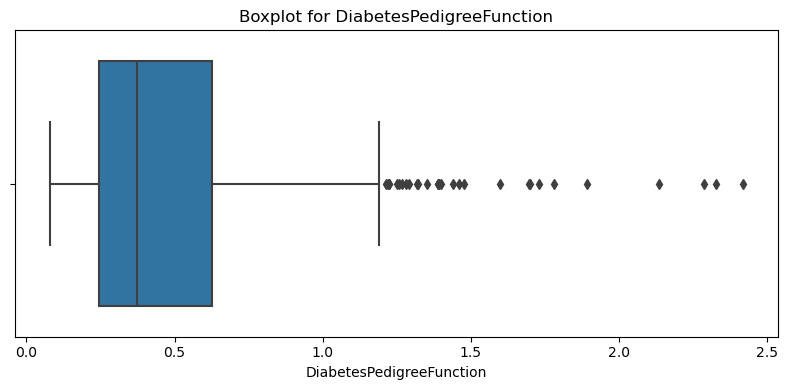

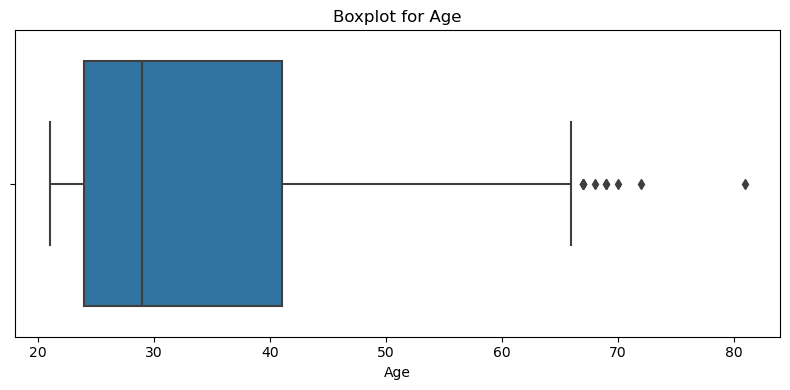

In [11]:
#create box plots for non-categorical columns
numeric_cols = diabetes_df.drop(columns ='Outcome')
for col in numeric_cols:
    fig, (ax_box) = plt.subplots(1, sharex=True, figsize=(8, 4))
    sns.boxplot(x=numeric_cols[col], ax=ax_box)
    ax_box.set(title=f'Boxplot for {col}')
    plt.tight_layout()

Pregnancies - Looking at the box plot, most women had between 1-6 pregnancies. There does seem to be a good amount of individuals that have 0 pregnancies, but that definitely makes sense, as some women may have very well never been pregnant. There does seem to be some extreme outliers with over 13 pregnancies. Although this doesn't really say much as some women could've simply had very high birth rates.

Glucose - The distribution for glucose has a slight right skew but is relatively tight when compared to other variables within the dataset. The fact that there is a single outlier near 0 might mean that it needs cleaning/imputation. Additionally, the median & IQR glucose level values suggest that many individuals have pre-diabetic/diabetic glucose levels (this makes sense as the main purpose of the exercise is to create a model that predicts diabetes).

Blood Pressure - The distrubition for blood pressure also has a slightly right skew, similar to glucose. However, the skew is small and it is relatively tight. There is also an outlier that is close to 0 here, which is pretty suspicious. This value will need further investigation to determine whether or not it needs handling.

Skin Thickness - Looking at the box plot for skin thickness, there is a heavy right skew with a single outlier near 100. While the outlier near 100 is definitely possible, there may be some values near/at 0 that needs handling. 

Insulin - The distribution for insulin is highly skewed and has a large number of outliers. It may be necessary to handle the data for this column a bit more simply because of the crazy distribution/number of outliers.

BMI - The data for BMI is right skewed, shown by the longer whisker on the high-BMI end. The outliers show that some individuals deviate significantly from the central tendency. Some of the values near 0 (or maybe are zero) should be investigated and values of 0 will definitely have to be taken care of, as it is impossible for a person to have a BMI of 0.

Diabetes Pedigree Function - The diabetes pedigree function (DPF) showcases how much of a risk a person has to get diabetes. Looking at the box plot, it can be seen that most of the individuals fall within the moderate risk category. However, there are quite a few outliers that are at high risk for diabetes and suggests that there could be a subset of individuals with high hereditary factors. DPF defunitely seems a storong predictor for whether or not a person will get/has diabetes and can definitely be combined with other features to predict diabetes.

Age - Looking at the boxplot for age, it can be seen that most of these ages are centered around younger ages causing a right skew, with a few outliers on the left. The presence of outliers might mean that there is necessary scaling in order to reduce their influence. Age definitely seems like a very useful feature to be included though, as just utilizing general knowledge, there are many diseases that have increased risks with increased age.

In [13]:
#value counts of outcome
print('Value counts of outcome: ', diabetes_df['Outcome'].value_counts())

Value counts of outcome:  Outcome
0    500
1    268
Name: count, dtype: int64


Looking at the value counts of each outcome (0-not diabetic, 1-diabetic), it can be seen that around 35% of the women in this dataset have diabetes. Now, it is our task to try and find a way to predict the outcome based on the other columns/features shown within this dataset. Hopefully, we are able to build a model that predicts the outcome as accurately as possible

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

### Pairwise Patterns

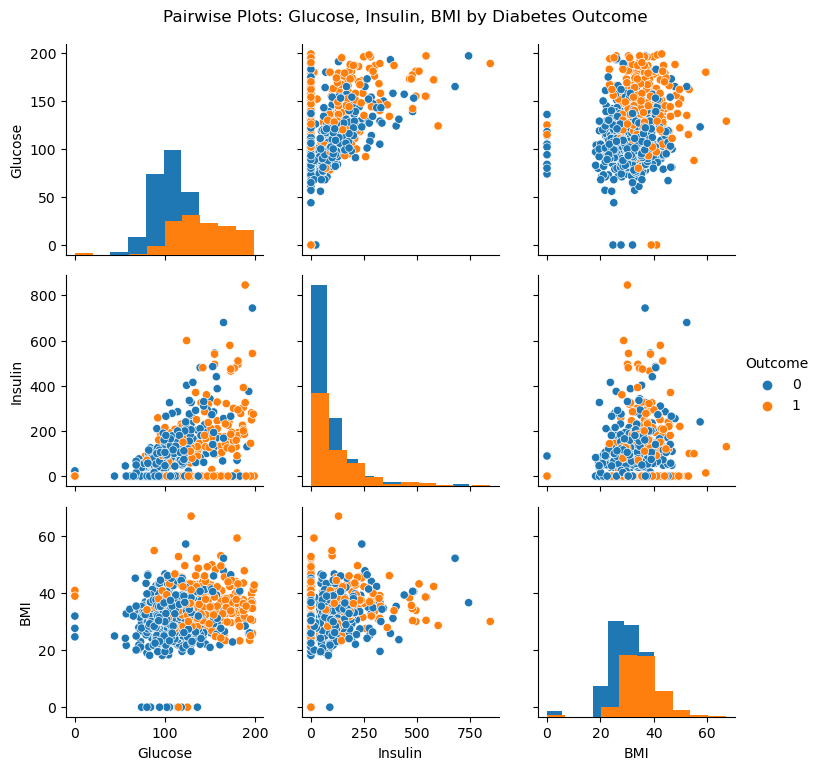

In [17]:
#create pairplots for glucose, insulin, and BMI based on outcome
g = sns.PairGrid(diabetes_df, vars=['Glucose', 'Insulin', 'BMI'], hue='Outcome', diag_sharey=True)
plt.suptitle('Pairwise Plots: Glucose, Insulin, BMI by Diabetes Outcome', y=1.02)
g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

Looking at the multiple pairs pairwise, various trends can be observed. 

The Glucose vs Insulin scatter shows a prositive triend-higher gluchose that generally corresponds to higher insulin. The diabetic cases (orange) skew towards the upper right, showing both higher glucose and higher insuline, suggesting a positive trend/correlation. Perhaps the person is more resistant to insulin, causing there to be more of both insulin and glucose within the bloodstream.

For Glucose vs BMI, it can be seen that many of the diabetic patients have higher BMI and the spread suggests that diabetic individuals clusters rightwards in terms of BMI. It can also be seen through the graph that diabetic individuals seem to have a tendency to have higher glucose levels.

For Insulin vs BMI, it looks like some diabetics appear at higher insulin and BMI levels, reinforcing the idea obesity is related to insulin intake. 

For all three of the features, there is a right-skewed distribution (seen especially in the Insulin distribution), which suggests that some sort of scaling would be useful before modeling.

### Univariate Pattern

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


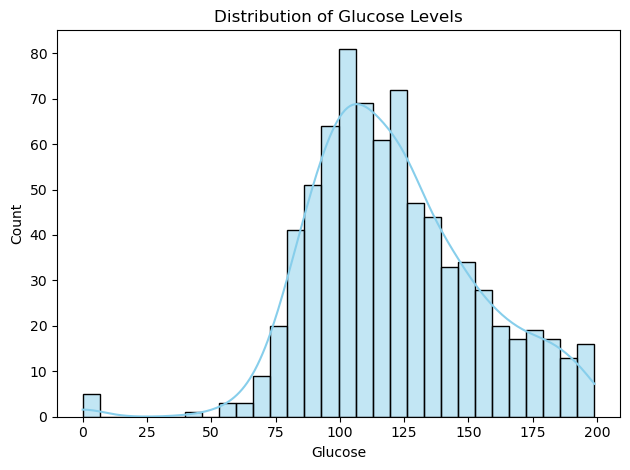

In [20]:
#histogram of glucose levels
sns.histplot(diabetes_df['Glucose'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Looking at the histogram distribution of glucose levels, it can be seen that the distribution is univariate and has a left skew with a tail trailing towards the left. Most of the glucose levels sit between 100-140 and suggest that most of these individuals have higher than normal glucose levels, as the normal glucose levels are between 99mg/dl or lower taken from [Northeast Medical Group](https://www.northeastmedicalgroup.org/articles/what-is-healthy-blood-sugar). Additionally, the small bar at 0 indicates that there could be glucose levels of 0, which is impossible for any living human, and will need to be addressed in the next step. Lastly, the skew/tapering could suggest some outlier within the dataset that we should keep in mind for later.

## Question 3: 
(5 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

### Check for Null Values

In [24]:
#check for null values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Surprisingly, it looks like the diabetes dataframe has no null values. Let's check to see if there are any invalid values within our dataframe.

### Check for Invalid Data

In [27]:
#describe the data
diabetes_df.describe(include='all').round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [28]:
#delete any duplicate rows
diabetes_df = diabetes_df.drop_duplicates()

In [29]:
#check dimensions
diabetes_df.shape

(768, 9)

In [30]:
#check zero values in specific columns
zero_values = (diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
zero_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [31]:
#replace zero values with NaN
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

#replace NaN values with the median of each column
diabetes_df.fillna(diabetes_df.median(), inplace=True)

In [32]:
#check dimensions
diabetes_df.shape

(768, 9)

To clean the data, we looked at any null values (there were none), looked at the described data (found some values that don't make sense), and deleted any duplicate rows (there were none). For columns such as glucose, blood pressure, and BMI, etc. it is quite literally impossible for a person to have values equal to 0 in those columns. To rectify this, I decided to replace those zeros with the median value within those columns. Now, the data is cleaned/prepped and we can use it to begin building necessary components for the SVM model.

## Question 4: 
(10 pts) Partition the data into train/test sets. After which, perform the following:
- encode any categorical data
- normalize numeric data.

Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

### Partition Data Into Train/Test Sets

In [36]:
#import necessary packages
from sklearn.model_selection import train_test_split

#partition data
#seperate features from target
X = diabetes_df.drop(columns='Outcome')
#obtain target variable
y = diabetes_df['Outcome']

#split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

The data has been partitioned in a reproducible way, with there being a random seed of 42 and the test size being 20% of the data set and the training size being 80%. The feature columns and the target variable have been successfully seperated so that they do not interfere with one another.

### Encode Any Categorical Data

In [39]:
#encode categorical data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


It looks like any categorical data such as outcome have already been encoded properly for the dataset. There is no need for me to do any more encoding.

### Normalize Numeric Data

In [42]:
#import sklearn scalar
from sklearn.preprocessing import StandardScaler

#normalize numeric data 
scaler = StandardScaler()
scaler.fit(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

#scale training data
X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [43]:
#check normalization
round(X_train.head(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,-0.85,-1.06,-0.83,-1.92,-1.20,-0.77,0.31,-0.79
711,0.36,0.14,0.48,-0.23,-1.47,-0.42,-0.12,0.56
373,-0.55,-0.56,-1.15,1.23,-0.56,0.36,-0.76,-0.71
46,-0.85,0.81,-1.32,-0.00,-0.16,-0.40,0.26,-0.37
682,-1.15,-0.89,-0.66,1.12,-0.42,1.78,-0.34,-0.96


Now the training data has been scaled/normalized and can be used in the model.

## Question 5: 
(20 pts) Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM model, train and evaluate it.
- Use GridSearchCV to tune at least two hyperparameters.**
- Perform cross validation.

**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

For the model it makes sense to use the SVC (classifer) model rather than the SVR (regression) model. This is because our target variable is a catagorical variable rather than a numerical one. This means that the SVC model would be more appropriate.

### Create Model

In [48]:
#import model packages
from sklearn.svm import SVC
#build the model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [49]:
#scale test data
X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [50]:
#gather predictions
y_pred = svm.predict(X_test)

print('The predicted diabetes outcome is: {}'.format(y_pred))

The predicted diabetes outcome is: [1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0]


In [51]:
#evaluate model
print('The accuracy of the model is: {}'.format(round(svm.score(X_test, y_test), 2))) 

The accuracy of the model is: 0.74


The accuracy of the model is 0.74, meaning that there is a 74% chance that the model is accurate in its predictions. This is definitely a pretty good start for predicting whether or not a woman would have diabetes. However, perhaps we can do better by tuning the model a bit.

### Tune Model

In [54]:
#import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

svm = SVC()

#define parameters for grid search
param_grid = {
    'C': np.arange(0.1, 10),
    'gamma': np.arange(0.001, 5)}

#grid search for tuning with cross-validation
svm_grid = GridSearchCV(svm, param_grid, cv=5, return_train_score=True)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]),
                         'gamma': array([1.000e-03, 1.001e+00, 2.001e+00, 3.001e+00, 4.001e+00])},
             return_train_score=True)

In [55]:
#print best model/parameters
print('Best parameters:', svm_grid.best_params_)
#print best score
print('Best score: {}'.format(round(svm_grid.best_score_, 2)))

Best parameters: {'C': 8.1, 'gamma': 0.001}
Best score: 0.77


From hypertuning the model using C and gamma as the hyperparameters to tune, it can be seen that the best parameters are 8.1 for C and 0.001 for gamma. Additionally, the best score that was found from tuning the model was 0.77. In other words, the model has a 77% accuracy rating when comparing the predictions to the results of the training data. This is 3% more than our initial model, and shows an increase in the accuracy rating of the model.

## Question 6: 
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

In [58]:
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
40,0.783798,0.003985,0.772038,0.021953
15,0.781760,0.003648,0.772025,0.026421
35,0.783391,0.004747,0.770412,0.024439
30,0.783390,0.004788,0.770412,0.024439
45,0.785832,0.002585,0.770412,0.020943


Looking at the mean/std train scores and the mean/std test scores, there isn't much deviation between the two values for each corresponding train and test category. This suggests that there is very little variance and that the model generalizes well from the training set to the test set. However, the accuracy itself shows shows only a moderate accuracy, with the model being about 77% accurate (gathered from the previous question). This could suggest that the model shows high bias and is too simple to capture the all of the relevant patterns within the data.

Overall, this model seems to predict quite well, with it being accurate over 50% of the time. That being said, I think that while this model could be useful in the medical industry, I do no think that this model should be used as a way to determine a diagnosis. I think that this model could be used as a sort of pre-screening/initial screening method and should not be relied on entirely for determining whether or not a patient has diabetes.